   total_bill   tip     sex smoker  day    time  size  percent_tip(%)
0       16.99  1.01  Female     No  Sun  Dinner     2             6.0
1       10.34  1.66    Male     No  Sun  Dinner     3            16.0
2       21.01  3.50    Male     No  Sun  Dinner     3            17.0
3       23.68  3.31    Male     No  Sun  Dinner     2            14.0
4       24.59  3.61  Female     No  Sun  Dinner     4            15.0 

Percent da Gorjeta Média de cada dia ------------------ 
day
Fri     16.95
Sat     15.37
Sun     16.70
Thur    16.11
Name: percent_tip(%), dtype: float64

Percent da Gorjeta Média por time --------------------- 
time
Dinner    15.98
Lunch     16.40
Name: percent_tip(%), dtype: float64

Dia mais lucrativo ------------------------------------ 
Dia: Sat
Valor: R$1778.4

Maior conta individual + gorjeta ---------------------- 
Bill: 50.81
Tip: 10.0

Pervenct de Gorjeta Média para mesmas >= 4 pessoas ---- 14.67

Quantity of smokers on Sundays ------------------- 19



<Axes: title={'center': 'Distribuição % Gorjeta'}, ylabel='Frequency'>

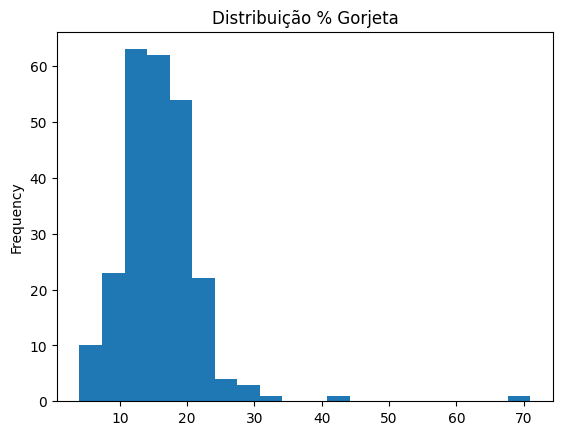

In [ ]:
"""
  Objetivo: Em pequenos grupos (3‑4), extrair 3 insights chavess do dataset tips.csv
  e recomendar 1 ação ao restaurante.

  Resultados esperados:

  Análise inicial das informações

  Percentual de gorjeta/conta;

  Gorjeta média (%) (geral, dia e “time”);

  Dia mais lucrativo;

  Maior conta individual + gorjeta;

  Gorjeta média para mesmas >= 4 pessoas;

  Fumantes aos domingos.

  Ao fim, executar tips["tip_pct"].plot.hist(bins=20, title="Distribuição % Gorjeta")

"""
import pandas as pd
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv'

tips = pd.read_csv(url)

tips

""" Análise Inicial  =  Uma pessoa foi em um restaurante, logo temos colunas referenciando
     Total_Bill | Tip | Sex | Smoker (Sim/Não) | Dia | ( Lunch / Dinner ) | Siza """


tips['percent_tip(%)'] = (( tips['tip']/tips['total_bill'] ) * 100).round(0)

print(tips.head(5),"\n")

gorjeta_media_geral = tips['percent_tip(%)'].mean().round(2)
gorjeta_media_dia = tips.groupby('day')['percent_tip(%)'].mean().round(2)
gorjeta_media_time = tips.groupby('time')['percent_tip(%)'].mean().round(2)
day_total_bill = tips.groupby('day')['total_bill'].sum()
dia_mais_lucrativo = day_total_bill.idxmax()
valor_dia_mais_lucrativo = day_total_bill.max()
maior_bill = tips['total_bill'].max()
maior_tip = tips['tip'].max()
gorjeta_media_4_pessoas = tips[tips['size'] >= 4]['percent_tip(%)'].mean().round(2)
quantity_smoker_sunday = tips[(tips['smoker'] == 'Yes') & (tips['day'] == "Sun")].shape[0] # shape[0] = só o número de linhas, shape[1] = só o número de colunas

print(f"Percent da Gorjeta Média de cada dia ------------------ \n{ gorjeta_media_dia }\n")
print(f"Percent da Gorjeta Média por time --------------------- \n{ gorjeta_media_time }\n")
print(f"Dia mais lucrativo ------------------------------------ \nDia: {dia_mais_lucrativo}\nValor: R${valor_dia_mais_lucrativo}\n")
print(f"Maior conta individual + gorjeta ---------------------- \nBill: {maior_bill}\nTip: {maior_tip}\n")
print(f"Pervenct de Gorjeta Média para mesmas >= 4 pessoas ---- { gorjeta_media_4_pessoas }\n")
print(f"Quantity of smokers on Sundays ------------------- {quantity_smoker_sunday}\n")
tips["percent_tip(%)"].plot.hist(bins=20, title="Distribuição % Gorjeta")